### Titanic disaster survivors

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

We analyze here what sorts of people were likely to survive, in order to predict, for each passenger, her chances of surviving the shipwreck and to evaluate the overall prediction performance of the algorithms applied.

In [2]:
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256)))

In [139]:
import numpy as np
import pandas as pd 
import scipy.stats as stats
import seaborn.apionly as sns

from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest
from sklearn.ensemble import ExtraTreesClassifier

### Data Handling
#### Let's read our data in using pandas:

In [8]:
df = pd.read_csv("../dataset/titanic.csv") 

Show an overview of our data: 

In [9]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
df.shape

(891, 12)

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

These are the meanings of each feature:

*Survival*: Survival(0 = No; 1 = Yes)  
*Pclass*: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
*Name*: Name  
*Sex*: Sex (female, male)  
*Age*: Age  
*SibSp*: Number of Siblings/Spouses Aboard  
*Parch*: Number of Parents/Children Aboard  
*Ticket*: Ticket Number  
*Fare*: Passenger Fare  
*Cabin*: Cabin  
*Embarked*: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


To have a better vision of the data we are going to display our feature with a countplot of seaborn. Show the counts of observations in each categorical bin using bars. The categorical features of our dataset are these are integer and object. We are going to separate our features into two lists: “categ” for the categorical features and “conti” for the continuous features. The “age” and the “fare” are the only two features that we can consider as continuous. In order to plot the distribution of the features with seaborn we are going to use distplot. According to the charts, there are no weird values (superior at 100) for “age” but we can see that the feature “fare” have a large scale and the most of value are between 0 and 100.

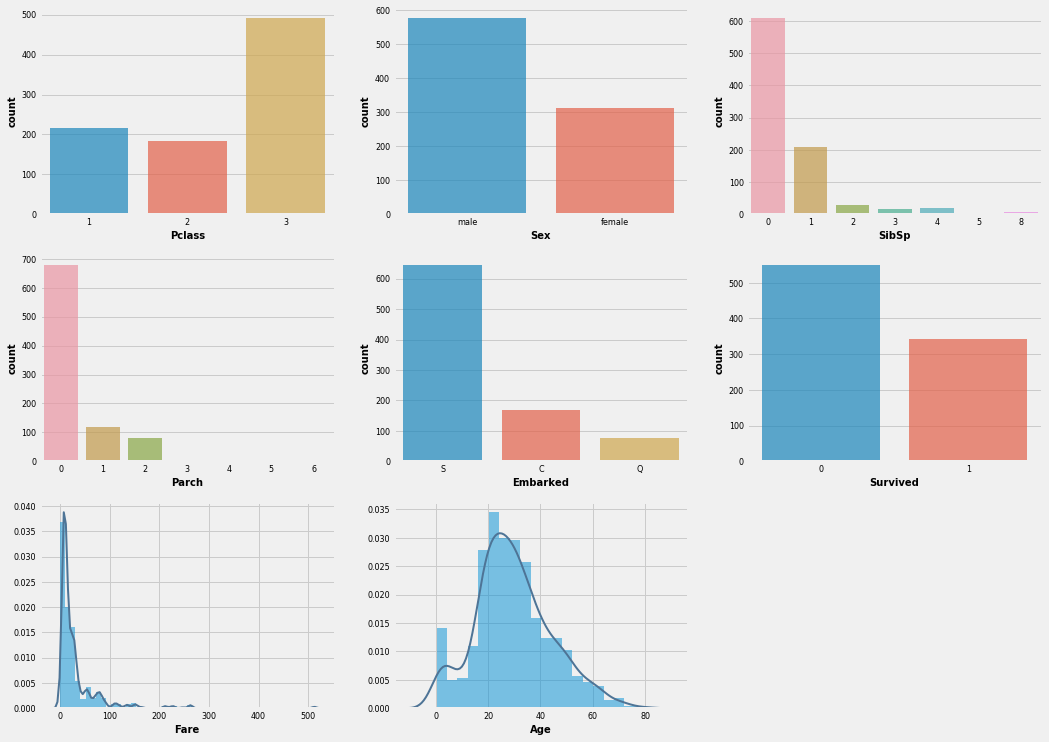

In [44]:
categ =  [ 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']
conti = ['Fare', 'Age']

#Distribution
fig = plt.figure(figsize=(16, 12))
for i in range (0,len(categ)):
    fig.add_subplot(3,3,i+1)
    sns.countplot(x=categ[i], data=df, alpha=.7) 

for col in conti:
    fig.add_subplot(3,3,i + 2)
    sns.distplot(df[col].dropna(), kde_kws={"lw": 2, "color":colors[8]}, 
                 hist_kws={"alpha": .5})
    i += 1
    
plt.show()

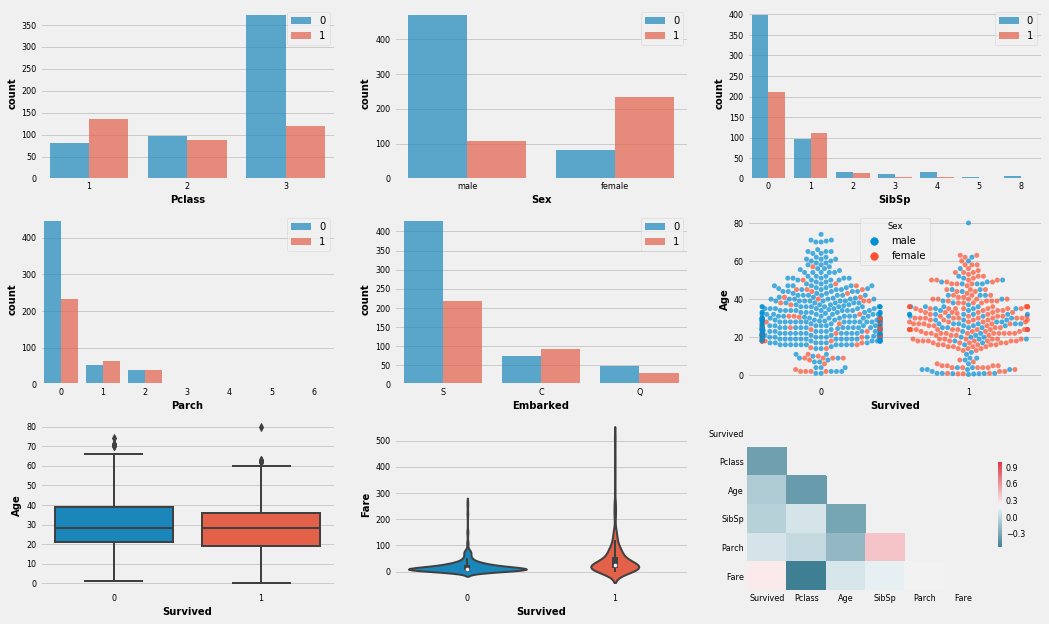

In [53]:
fig = plt.figure(figsize=(16, 10))
i = 1
for col in categ:
    if col != 'Survived':
        fig.add_subplot(3,3,i)
        g = sns.countplot(x=col, data=df,hue='Survived', alpha=.7)
        plt.legend(loc=1) 
        i += 1

# Box plot survived x age
fig.add_subplot(3,3,6)
sns.swarmplot(x="Survived", y="Age", hue="Sex", alpha=.7, data=df);
fig.add_subplot(3,3,7)
sns.boxplot(x="Survived", y="Age", data=df)

# fare and Survived
fig.add_subplot(3,3,8)
sns.violinplot(x="Survived", y="Fare", alpha=.7, data=df)

# correlations with the new features
corr = df.drop(['PassengerId'], axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig.add_subplot(3,3,9)
sns.heatmap(corr, mask=mask, cmap=cmap, cbar_kws={"shrink": .5})
plt.show()

### Take care of missing values:

#### Age

In [168]:
print('Number of null values: {0:d}'.format(sum(pd.isnull(df['Age']))))

Number of null values: 177


In [173]:
print('Ratio of null values: {0:5.3f}'.format(sum(pd.isnull(df['Age']))/df.shape[0]))

Ratio of null values: 0.199


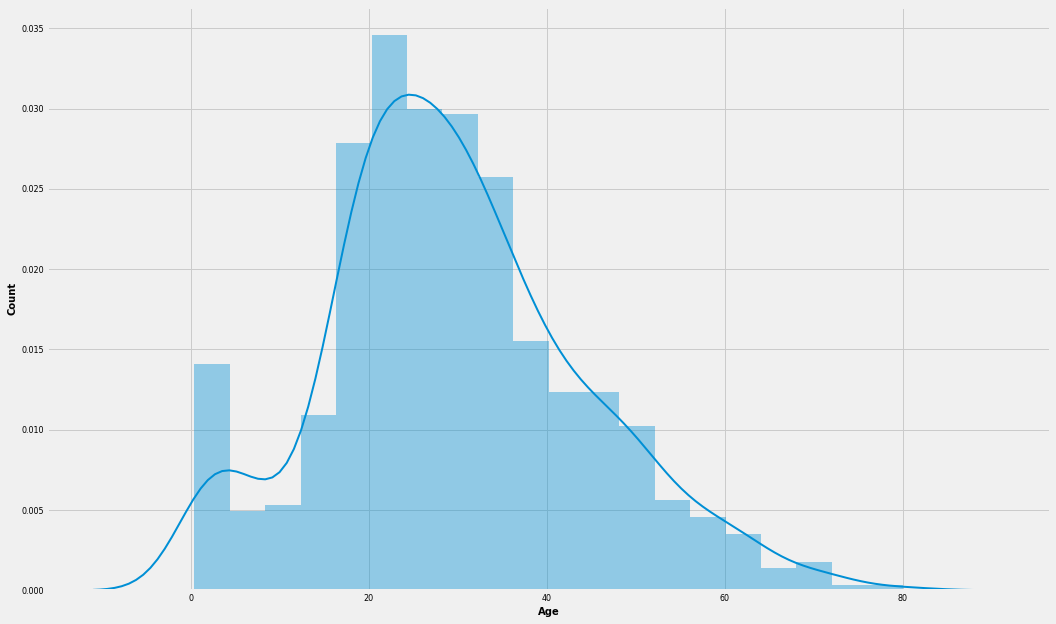

In [185]:
plt.figure(figsize=(16,10))
sns.distplot(df[df['Age'].notnull()]['Age'],hist=True,bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

*Age* is (right) skewed: using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we use the median to impute the missing values.

In [189]:
df['Age'] = df['Age'].fillna(df['Age'].median(skipna=True))

The features *Age* and *Cabin* have many missing values, while *Embarked* just a few. Since *Cabin* do not seem to add much value to our analysis, we will drop it from the dataframe.

In [55]:
df = df.drop(['Cabin'], axis=1) 
df.shape

(891, 11)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [59]:
df = df.dropna(subset=['Embarked'])
df.shape

(889, 11)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [75]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

KeyError: "['PassengerId' 'Name' 'Ticket'] not found in axis"

In [84]:

df = pd.get_dummies(df,drop_first=True,columns=['Sex', 'Embarked'])

In [85]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [86]:
df_reduced = df.dropna()
df_reduced.shape

(712, 9)

In [155]:
X = df_reduced.drop(['Survived'], axis=1)
y = df_reduced['Survived']

In [156]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_

In [157]:
ff = np.array([e.feature_importances_ for e in forest.estimators_])
dd = pd.DataFrame(ff, columns=X.columns)

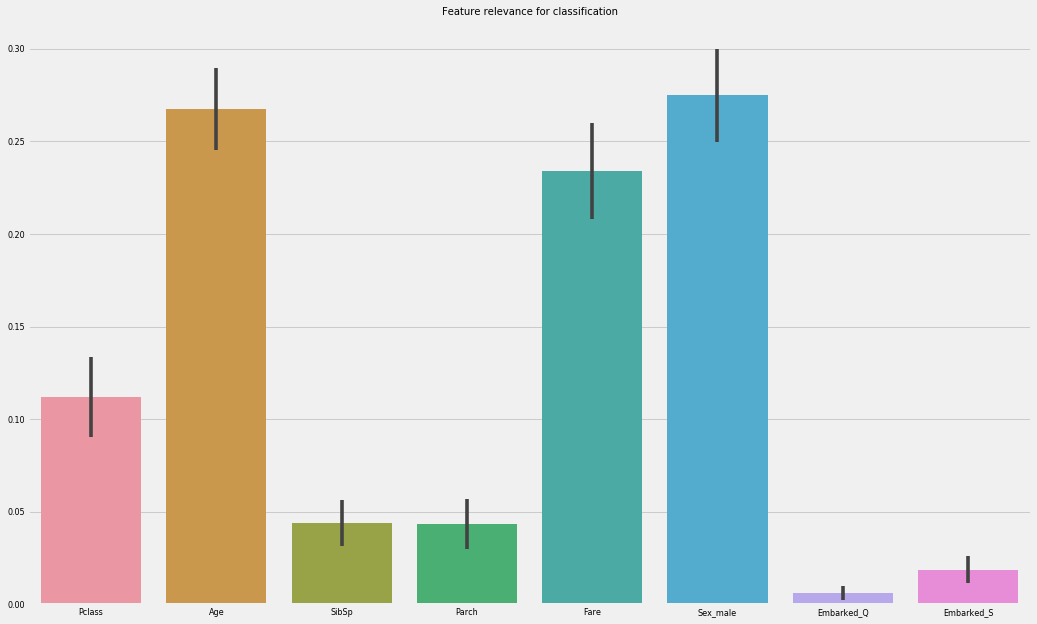

In [158]:
fig = plt.figure(figsize=(16, 10))
sns.barplot(data=dd, ci="sd")
plt.title('Feature relevance for classification')
plt.show()

In [159]:
mi = mutual_info_classif(X, y)
dmi = pd.DataFrame(mi, index=X.columns, columns=['mi']).sort_values(by='mi', ascending=False)
dmi

,mi
Fare,0.134214
Sex_male,0.127763
Pclass,0.102896
Parch,0.017632
SibSp,0.014747
Embarked_Q,0.010427
Age,0.009760
Embarked_S,0.000000


In [160]:
fc = SelectKBest(f_classif, k='all').fit(X, y)
dfc = pd.DataFrame(np.array([fc.scores_, fc.pvalues_]).T, index=X.columns, columns=['score','pval']).sort_values(by='score', ascending=False)
dfc

,score,pval
Sex_male,287.349355,2.242852e-54
Pclass,103.347946,9.303620e-23
Fare,54.105548,5.256796e-13
Embarked_S,18.418724,2.019203e-05
Parch,6.502602,1.098061e-02
Age,4.859127,2.782032e-02
Embarked_Q,1.706443,1.918705e-01
SibSp,0.171126,6.792381e-01


According to the data dictionary, both SibSp and Parch relate to traveling with family.  For simplicity's sake, let us combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [161]:
X['TravelBuds']=X["SibSp"]+X["Parch"]
X['TravelAlone']=np.where(X['TravelBuds']>0, 0, 1)
X.drop('SibSp', axis=1, inplace=True)
X.drop('Parch', axis=1, inplace=True)
X.drop('TravelBuds', axis=1, inplace=True)

In [162]:
fc = SelectKBest(f_classif, k='all').fit(X, y)
dfc = pd.DataFrame(np.array([fc.scores_, fc.pvalues_]).T, index=X.columns, columns=['score','pval']).sort_values(by='score', ascending=False)
dfc

,score,pval
Sex_male,287.349355,2.242852e-54
Pclass,103.347946,9.303620e-23
Fare,54.105548,5.256796e-13
TravelAlone,29.503642,7.673297e-08
Embarked_S,18.418724,2.019203e-05
Age,4.859127,2.782032e-02
Embarked_Q,1.706443,1.918705e-01


In [163]:
mi = mutual_info_classif(X, y)
dmi = pd.DataFrame(mi, index=X.columns, columns=['mi']).sort_values(by='mi', ascending=False)
dmi

,mi
Fare,0.140032
Sex_male,0.127502
Pclass,0.068223
Embarked_S,0.064926
TravelAlone,0.033116
Embarked_Q,0.021525
Age,0.016758


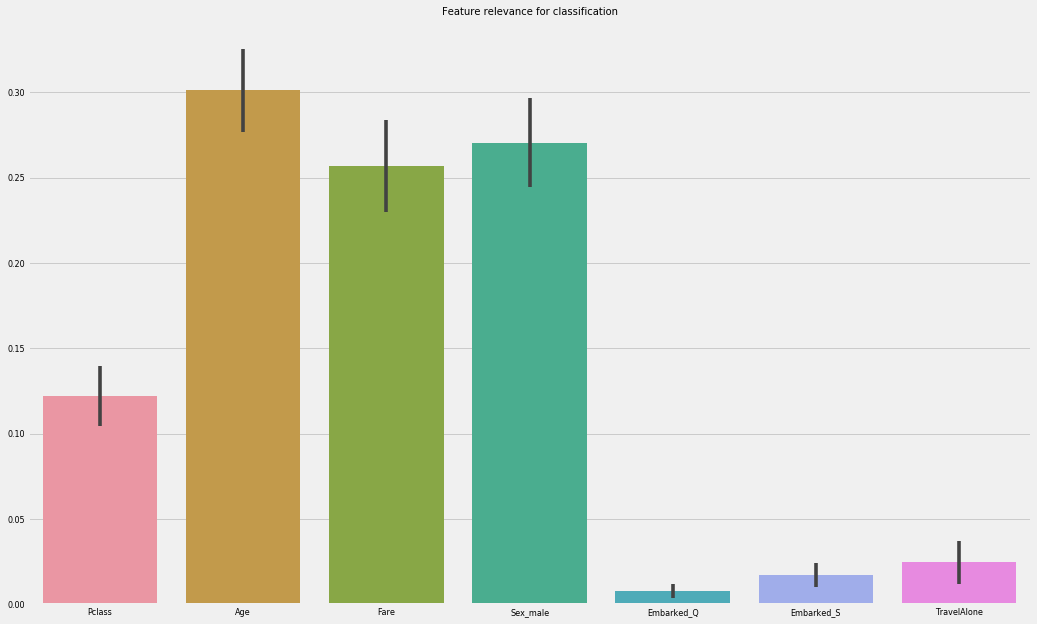

In [164]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
ff = np.array([e.feature_importances_ for e in forest.estimators_])
dd = pd.DataFrame(ff, columns=X.columns)
fig = plt.figure(figsize=(16, 10))
sns.barplot(data=dd, ci="sd")
plt.title('Feature relevance for classification')
plt.show()